# Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np                  #Importing libraries for data analysis and Visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os                          #uploading windows to read the files
os.listdir('./')

['.config',
 'Emaildata_Test.csv',
 'Test.csv',
 'transactionsdata_Train.csv',
 'Train.csv',
 'Customerdata_Test.csv',
 'Emaildata_Train.csv',
 'Customerdata_Train.csv',
 'SravanKumar_Venigalla_RPL_FinalHack.csv',
 'transactionsdata_Test.csv',
 'sample_data']

# Data Cleaning

Reading the data files for data Analysis

In [4]:
df1 = pd.read_csv('./Train.csv')
df2 = pd.read_csv('./Customerdata_Train.csv')
df3 = pd.read_csv('./transactionsdata_Train.csv')
df4 = pd.read_csv('./Emaildata_Train.csv')

Dimensions for all the files

In [5]:
df1.shape , df2.shape , df3.shape , df4.shape  

((23820, 2), (23820, 7), (104755, 4), (517672, 6))

Checking the columns in the files

In [6]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['CustomerID', 'RetentionPotential'], dtype='object')
Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')


Checking the unique values 

In [7]:
df1.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

In [8]:
df2.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [9]:
df3.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

In [10]:
df4.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

Merging the datasets df1 and df2 based on CustomerId

In [11]:
data1 = pd.merge(df1,df2,on=['CustomerID'],how = 'inner')

In [12]:
data1.shape                #Dimension of new dataset

(23820, 8)

In [13]:
data1.nunique()           #Unique values for new dataset

CustomerID              23820
RetentionPotential          3
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [14]:
data1.head()              #to see first five records

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C37869,Low,CITY4,7/27/2011,0,0,0,Thursday
1,C33841,Low,CITY1,11/19/2013,1,0,1,Thursday
2,C29464,Low,CITY2,5/24/2010,0,0,0,Tuesday
3,C28158,Low,CITY1,6/19/2017,1,0,0,Saturday
4,C22785,High,CITY2,12/13/2013,1,0,0,Thursday


In [15]:
data1.isna().sum()         # Cheking whether there are missing values or not

CustomerID              0
RetentionPotential      0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [16]:
data1.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C37869,Low,CITY4,7/27/2011,0,0,0,Thursday
1,C33841,Low,CITY1,11/19/2013,1,0,1,Thursday
2,C29464,Low,CITY2,5/24/2010,0,0,0,Tuesday
3,C28158,Low,CITY1,6/19/2017,1,0,0,Saturday
4,C22785,High,CITY2,12/13/2013,1,0,0,Thursday


In [17]:
data1.nunique()

CustomerID              23820
RetentionPotential          3
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [18]:
data1['RetentionPotential'].value_counts()

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

Since timestamp is not required so we can drop from files in df3 and df4

In [19]:
df3 = df3.drop('timestamp',axis=1)

In [20]:
df3.nunique()

CustomerID       23820
DateOfOrder       3151
OrderQuantity      451
dtype: int64

In [21]:
df4 = df4.drop(['timestamp'],axis=1)

In [22]:
df4.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
MailOpened         2
MailClicked        3
dtype: int64

In [23]:
df4['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

Here we observed the no of customers are having one welcome mail and customized mail

In [24]:
print(data1.columns)
print(df3.columns)
print(df4.columns)

Index(['CustomerID', 'RetentionPotential', 'City', 'DateOfRegistration',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')


Taking sum of order quantity for all customers to see total orderquantity
Count for order quantity 

In [25]:
d1 = df3.groupby(['CustomerID'])['OrderQuantity'].agg(sum).reset_index()

In [26]:
new = df3.groupby(['CustomerID'])['OrderQuantity'].count().reset_index()
new = new.rename(columns={'OrderQuantity':'No_Of_Orders'})

In [27]:
d1 = d1.merge(new,on='CustomerID')

In [28]:
d1.head()

,CustomerID,OrderQuantity,No_Of_Orders
0,C12116,115,3
1,C12117,41,1
2,C12118,41,1
3,C12119,52,1
4,C12120,31,1


In [29]:
d1.shape

(23820, 3)

In [30]:
d1.shape

(23820, 3)

In [31]:
d1.nunique()

CustomerID       23820
OrderQuantity     2206
No_Of_Orders       150
dtype: int64

In [32]:
data1.columns

Index(['CustomerID', 'RetentionPotential', 'City', 'DateOfRegistration',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay'],
      dtype='object')

In [33]:
data2 = pd.merge(data1,d1,on=['CustomerID'],how='inner') #Merging the data1 and d1 file based on customers

In [34]:
data2.shape

(23820, 10)

In [35]:
data2.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders
0,C37869,Low,CITY4,7/27/2011,0,0,0,Thursday,982,8
1,C33841,Low,CITY1,11/19/2013,1,0,1,Thursday,43,1
2,C29464,Low,CITY2,5/24/2010,0,0,0,Tuesday,51,1
3,C28158,Low,CITY1,6/19/2017,1,0,0,Saturday,60,1
4,C22785,High,CITY2,12/13/2013,1,0,0,Thursday,41,1


In [36]:
data2.nunique()

CustomerID              23820
RetentionPotential          3
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
OrderQuantity            2206
No_Of_Orders              150
dtype: int64

In [37]:
df4.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')

In [38]:
df4.shape

(517672, 5)

Since the dimension for df4 is very high becasue the data is given for every instance 
so we have to reduce the dimension according to unique customers

In [39]:
df4.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
MailOpened         2
MailClicked        3
dtype: int64

In [40]:
df4['EmailType'].value_counts()  #Checking the counts for Emailtype column

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

Separated the Customers accoding to WelcomeEmail

In [41]:
df4_1 = df4.loc[df4['EmailType'] == 'WelcomeEmail']

In [42]:
df4_1

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable
...,...,...,...,...,...
23815,C23511,2018-01-17,WelcomeEmail,yes,NotApplicable
23816,C12197,2018-01-17,WelcomeEmail,yes,NotApplicable
23817,C40967,2018-01-17,WelcomeEmail,yes,NotApplicable
23818,C36140,2018-01-17,WelcomeEmail,yes,NotApplicable


In [43]:
df4_1['MailClicked'].value_counts() 

NotApplicable    23820
Name: MailClicked, dtype: int64

Similarly for Customized mails

In [44]:
df4_2 = df4.loc[df4['EmailType'] == 'CustomizedEmail']
df4_2

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
23820,C16368,2013-05-20,CustomizedEmail,yes,no
23821,C16368,2013-02-05,CustomizedEmail,yes,no
23822,C16368,2012-11-26,CustomizedEmail,yes,no
23823,C16368,2013-05-30,CustomizedEmail,yes,no
23824,C16368,2013-05-18,CustomizedEmail,yes,no
...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,no,no
517669,C36140,2018-01-20,CustomizedEmail,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,yes,no


In [45]:
df4_2['MailClicked'].value_counts()

no     466011
yes     27841
Name: MailClicked, dtype: int64

Taking the count of customized mails to reduce the dimension

In [46]:
d2 = df4_2.groupby(['CustomerID'])['EmailType'].agg('count').reset_index()

In [47]:
d2

,CustomerID,EmailType
0,C12116,31
1,C12119,41
2,C12122,45
3,C12123,28
4,C12124,32
...,...,...
14106,C42181,47
14107,C42182,49
14108,C42183,41
14109,C42185,43


Merging this dataset with welcomemails

In [48]:
data3 = pd.merge(df4_1,d2,on=['CustomerID'],how='outer') 
data3.head()

,CustomerID,DateOfemail,EmailType_x,MailOpened,MailClicked,EmailType_y
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0


Renaming the columns for our understanding

In [49]:
data3 = data3.rename(columns={'EmailType_x':'EmailType','EmailType_y':'CustomMails'})

In [50]:
data3.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0


In [51]:
df4_2.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
23820,C16368,2013-05-20,CustomizedEmail,yes,no
23821,C16368,2013-02-05,CustomizedEmail,yes,no
23822,C16368,2012-11-26,CustomizedEmail,yes,no
23823,C16368,2013-05-30,CustomizedEmail,yes,no
23824,C16368,2013-05-18,CustomizedEmail,yes,no


Dividing the df4_2 based on Mailopend yes and no

In [52]:
df4_3 = df4_2.loc[df4_2['MailOpened']=='yes']
df4_4 = df4_2.loc[df4_2['MailOpened']=='no']

Taking the count for yes and no for mailopend 

In [53]:
d3 = df4_3.groupby(['CustomerID'])['MailOpened'].agg('count').reset_index()
d4 = df4_4.groupby(['CustomerID'])['MailOpened'].agg('count').reset_index()

In [54]:
d3

,CustomerID,MailOpened
0,C12116,4
1,C12119,13
2,C12123,6
3,C12124,4
4,C12125,1
...,...,...
12177,C42181,3
12178,C42182,2
12179,C42183,4
12180,C42185,9


In [55]:
d4

,CustomerID,MailOpened
0,C12116,27
1,C12119,28
2,C12122,45
3,C12123,22
4,C12124,28
...,...,...
13616,C42181,44
13617,C42182,47
13618,C42183,37
13619,C42185,34


Again merging the datasets according to customer ids

In [56]:
data4 = pd.merge(data3,d3,on=['CustomerID'],how='outer')
data4

,CustomerID,DateOfemail,EmailType,MailOpened_x,MailClicked,CustomMails,MailOpened_y
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0,29.0
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0,88.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0,27.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0,18.0
...,...,...,...,...,...,...,...
23815,C23511,2018-01-17,WelcomeEmail,yes,NotApplicable,NaN,NaN
23816,C12197,2018-01-17,WelcomeEmail,yes,NotApplicable,NaN,NaN
23817,C40967,2018-01-17,WelcomeEmail,yes,NotApplicable,NaN,NaN
23818,C36140,2018-01-17,WelcomeEmail,yes,NotApplicable,8.0,6.0


In [57]:
data5 = pd.merge(data4,d4,on=['CustomerID'],how='outer')
data5.head()

,CustomerID,DateOfemail,EmailType,MailOpened_x,MailClicked,CustomMails,MailOpened_y,MailOpened
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0,29.0,NaN
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0,88.0,7.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0,27.0,3.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0,18.0,46.0


Renaming the columns

In [58]:
data5 = data5.rename(columns={'MailOpened_x':'MailOpened','MailOpened_y':'CustomMail_Open','MailOpened':'CustomMail_No'})

In [59]:
data5.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0,29.0,NaN
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0,88.0,7.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0,27.0,3.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0,18.0,46.0


In [60]:
df4_2.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
23820,C16368,2013-05-20,CustomizedEmail,yes,no
23821,C16368,2013-02-05,CustomizedEmail,yes,no
23822,C16368,2012-11-26,CustomizedEmail,yes,no
23823,C16368,2013-05-30,CustomizedEmail,yes,no
23824,C16368,2013-05-18,CustomizedEmail,yes,no


Again separating the mailclicked with yes and no

In [61]:
df4_5 = df4_2.loc[df4_2['MailClicked']=='yes']
df4_6 = df4_2.loc[df4_2['MailClicked']=='no']

Taking the count for yes and no for mail clicked

In [62]:
d5 = df4_5.groupby(['CustomerID'])['MailClicked'].agg('count').reset_index()
d6 = df4_6.groupby(['CustomerID'])['MailClicked'].agg('count').reset_index()
d5

,CustomerID,MailClicked
0,C12116,2
1,C12119,4
2,C12123,5
3,C12129,1
4,C12130,1
...,...,...
8631,C42176,10
8632,C42177,2
8633,C42181,1
8634,C42182,1


Similary we merged the datasets according to customerids

In [63]:
data6 = pd.merge(data5,d5,on=['CustomerID'],how='outer')
data6.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked_x,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_y
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0,29.0,NaN,1.0
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0,88.0,7.0,10.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0,27.0,3.0,4.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0,18.0,46.0,10.0


In [64]:
data7 = pd.merge(data6,d6,on=['CustomerID'],how='outer',sort=True)
data7.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked_x,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_y,MailClicked
0,C12116,2013-09-23,WelcomeEmail,yes,NotApplicable,31.0,4.0,27.0,2.0,29.0
1,C12117,2013-12-05,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12118,2013-09-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12119,2013-04-13,WelcomeEmail,yes,NotApplicable,41.0,13.0,28.0,4.0,37.0
4,C12120,2014-01-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN


Renaming the columns 

In [65]:
data7 = data7.rename(columns={'MailClicked_x':'MailClicked','MailClicked_y':'MailClicked_Open','MailClicked':'MailClicked_No'})

Finally we reduced the df4 dataset dimensions by pandas functions and reduced to data7

In [66]:
data7.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No
0,C12116,2013-09-23,WelcomeEmail,yes,NotApplicable,31.0,4.0,27.0,2.0,29.0
1,C12117,2013-12-05,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12118,2013-09-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12119,2013-04-13,WelcomeEmail,yes,NotApplicable,41.0,13.0,28.0,4.0,37.0
4,C12120,2014-01-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN


We can check the data7 shape which is modifing the df4

In [67]:
data7.shape

(23820, 10)

In [68]:
data7.nunique()

CustomerID          23820
DateOfemail          2673
EmailType               1
MailOpened              1
MailClicked             1
CustomMails            83
CustomMail_Open        60
CustomMail_No          69
MailClicked_Open       29
MailClicked_No         79
dtype: int64

Merged the datasets

In [69]:
data = pd.merge(data2,data7,on=['CustomerID'],how='outer',sort=True)

In [70]:
data.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No
0,C12116,Low,CITY3,9/23/2013,0,0,0,Friday,115,3,2013-09-23,WelcomeEmail,yes,NotApplicable,31.0,4.0,27.0,2.0,29.0
1,C12117,Low,CITY2,12/5/2013,1,0,0,Friday,41,1,2013-12-05,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12118,High,CITY4,9/10/2013,1,0,0,Wednesday,41,1,2013-09-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12119,Low,CITY2,4/13/2013,0,0,0,Monday,52,1,2013-04-13,WelcomeEmail,yes,NotApplicable,41.0,13.0,28.0,4.0,37.0
4,C12120,Low,CITY3,1/10/2014,1,0,0,Tuesday,31,1,2014-01-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN


In [71]:
data.shape

(23820, 19)

In [72]:
data.isna().sum()

CustomerID                  0
RetentionPotential          0
City                        0
DateOfRegistration          0
OnlineCommunication         0
AutomaticRefill             0
DoorstepDelivery            0
PreferredDeliveryDay        0
OrderQuantity               0
No_Of_Orders                0
DateOfemail                 0
EmailType                   0
MailOpened                  0
MailClicked                 0
CustomMails              9709
CustomMail_Open         11638
CustomMail_No           10199
MailClicked_Open        15184
MailClicked_No           9752
dtype: int64

Since there are null values,so we are filling with 0
Because the custom mails are having only few customers so remaining customers having the null values 
We can't fill it with mean,median 

In [73]:
finaldata = data.fillna(0)

In [74]:
finaldata.isna().sum()

CustomerID              0
RetentionPotential      0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity           0
No_Of_Orders            0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
CustomMails             0
CustomMail_Open         0
CustomMail_No           0
MailClicked_Open        0
MailClicked_No          0
dtype: int64

In [75]:
finaldata.dtypes

CustomerID               object
RetentionPotential       object
City                     object
DateOfRegistration       object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
OrderQuantity             int64
No_Of_Orders              int64
DateOfemail              object
EmailType                object
MailOpened               object
MailClicked              object
CustomMails             float64
CustomMail_Open         float64
CustomMail_No           float64
MailClicked_Open        float64
MailClicked_No          float64
dtype: object

In [76]:
finaldata.shape

(23820, 19)

# Feature Engineering 

Adding the columns based on date of email and date of registration
Converting those columns into mutliple columns based on date month year
Dropping those columns also customerid bacause of unique values

In [77]:
id = finaldata['CustomerID']

In [78]:
finaldata['MonthOfRegistration'] = pd.to_datetime(finaldata['DateOfRegistration']).dt.month
finaldata['MonthOfemail'] = pd.to_datetime(finaldata['DateOfemail']).dt.month
finaldata['YearOfRegistration'] = pd.to_datetime(finaldata['DateOfRegistration']).dt.year
finaldata['YearOfemail'] = pd.to_datetime(finaldata['DateOfemail']).dt.year
finaldata['Date_of_Registration'] = pd.to_datetime(finaldata['DateOfRegistration']).dt.day
finaldata['Date_of_email'] = pd.to_datetime(finaldata['DateOfemail']).dt.day
finaldata = finaldata.drop(['DateOfRegistration','DateOfemail','CustomerID'],axis=1)

In [79]:
finaldata.head()

,RetentionPotential,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,...,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail,YearOfRegistration,YearOfemail,Date_of_Registration,Date_of_email
0,Low,CITY3,0,0,0,Friday,115,3,WelcomeEmail,yes,...,4.0,27.0,2.0,29.0,9,9,2013,2013,23,23
1,Low,CITY2,1,0,0,Friday,41,1,WelcomeEmail,yes,...,0.0,0.0,0.0,0.0,12,12,2013,2013,5,5
2,High,CITY4,1,0,0,Wednesday,41,1,WelcomeEmail,yes,...,0.0,0.0,0.0,0.0,9,9,2013,2013,10,10
3,Low,CITY2,0,0,0,Monday,52,1,WelcomeEmail,yes,...,13.0,28.0,4.0,37.0,4,4,2013,2013,13,13
4,Low,CITY3,1,0,0,Tuesday,31,1,WelcomeEmail,yes,...,0.0,0.0,0.0,0.0,1,1,2014,2014,10,10


In [80]:
finaldata.nunique()

RetentionPotential         3
City                       4
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
OrderQuantity           2206
No_Of_Orders             150
EmailType                  1
MailOpened                 1
MailClicked                1
CustomMails               84
CustomMail_Open           61
CustomMail_No             70
MailClicked_Open          30
MailClicked_No            80
MonthOfRegistration       12
MonthOfemail              12
YearOfRegistration        11
YearOfemail               11
Date_of_Registration      31
Date_of_email             31
dtype: int64

In [81]:
finaldata.dtypes

RetentionPotential       object
City                     object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
OrderQuantity             int64
No_Of_Orders              int64
EmailType                object
MailOpened               object
MailClicked              object
CustomMails             float64
CustomMail_Open         float64
CustomMail_No           float64
MailClicked_Open        float64
MailClicked_No          float64
MonthOfRegistration       int64
MonthOfemail              int64
YearOfRegistration        int64
YearOfemail               int64
Date_of_Registration      int64
Date_of_email             int64
dtype: object

Since the OnlineCommunication,Doorstepdelivery and Automatic Refill are categorical columns but the dtypes is displaying in numerical.
Convert them into categorical columns

In [82]:
finaldata['OnlineCommunication'] = finaldata['OnlineCommunication'].astype('object')
finaldata['DoorstepDelivery'] = finaldata['DoorstepDelivery'].astype('object')
finaldata['AutomaticRefill'] = finaldata['AutomaticRefill'].astype('object')

Separating the categorical and numerical columns 

In [83]:
cat_cols = finaldata.select_dtypes(include='object').columns
num_cols = finaldata.select_dtypes(exclude='object').columns

Converting the object dtypes into category

In [84]:
for col in cat_cols:
    finaldata[col] = finaldata[col].astype('category')

In [85]:
finaldata.dtypes

RetentionPotential      category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
OrderQuantity              int64
No_Of_Orders               int64
EmailType               category
MailOpened              category
MailClicked             category
CustomMails              float64
CustomMail_Open          float64
CustomMail_No            float64
MailClicked_Open         float64
MailClicked_No           float64
MonthOfRegistration        int64
MonthOfemail               int64
YearOfRegistration         int64
YearOfemail                int64
Date_of_Registration       int64
Date_of_email              int64
dtype: object

Replacing the Retention Potential with values according to problem statement

In [86]:
finaldata['RetentionPotential'].replace(to_replace='High',value=0,inplace=True)
finaldata['RetentionPotential'].replace(to_replace='Medium',value=1,inplace=True)
finaldata['RetentionPotential'].replace(to_replace='Low',value=2,inplace=True)

In [87]:
finaldata.head()

,RetentionPotential,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,...,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail,YearOfRegistration,YearOfemail,Date_of_Registration,Date_of_email
0,2,CITY3,0,0,0,Friday,115,3,WelcomeEmail,yes,...,4.0,27.0,2.0,29.0,9,9,2013,2013,23,23
1,2,CITY2,1,0,0,Friday,41,1,WelcomeEmail,yes,...,0.0,0.0,0.0,0.0,12,12,2013,2013,5,5
2,0,CITY4,1,0,0,Wednesday,41,1,WelcomeEmail,yes,...,0.0,0.0,0.0,0.0,9,9,2013,2013,10,10
3,2,CITY2,0,0,0,Monday,52,1,WelcomeEmail,yes,...,13.0,28.0,4.0,37.0,4,4,2013,2013,13,13
4,2,CITY3,1,0,0,Tuesday,31,1,WelcomeEmail,yes,...,0.0,0.0,0.0,0.0,1,1,2014,2014,10,10


## Data Visualisation

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

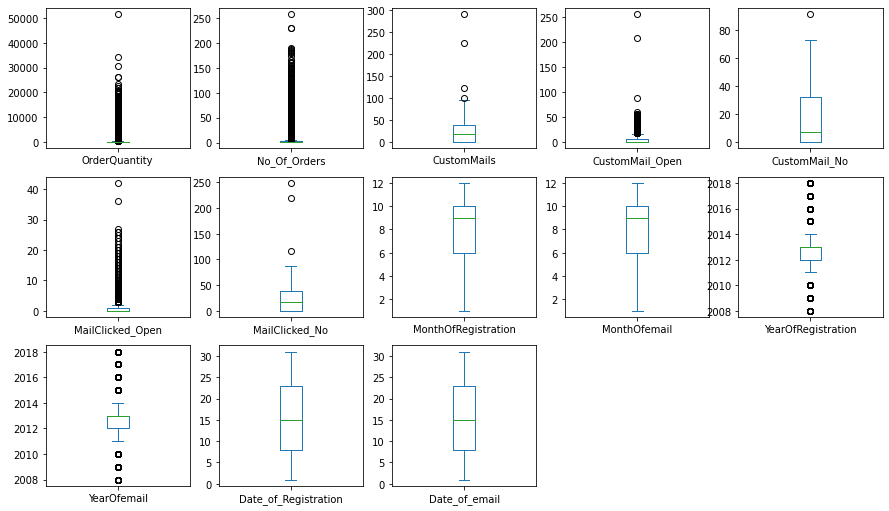

In [89]:
finaldata.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(5,5),figsize=(15,15))
plt.show()

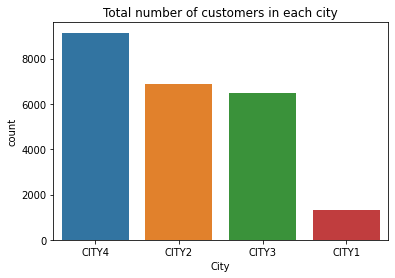

In [90]:
#Countplot for Customers count in particular city
sns.countplot('City', data=finaldata,order = finaldata['City'].value_counts().index)
plt.title('Total number of customers in each city')
plt.show()

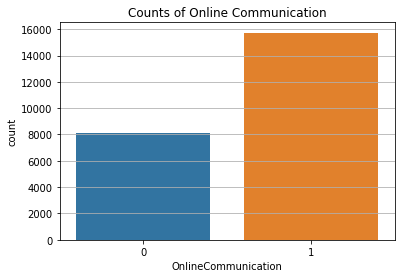

In [91]:
plt.grid()
sns.countplot(x=finaldata['OnlineCommunication'])
plt.title('Counts of Online Communication')
plt.show()

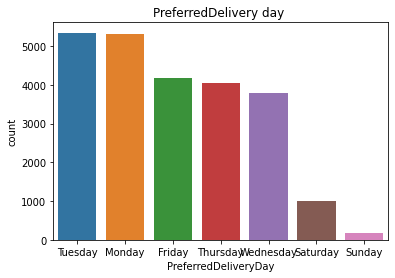

In [92]:
#Countplot for Customers count in preferred delivery day
sns.countplot('PreferredDeliveryDay',data=finaldata,order = finaldata['PreferredDeliveryDay'].value_counts().index)
plt.title('PreferredDelivery day ')
plt.show()

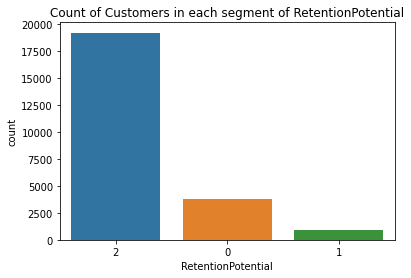

In [93]:
#Countplot for Customers count in each level of target variable
sns.countplot('RetentionPotential', data=finaldata,order = finaldata['RetentionPotential'].value_counts().index)
plt.title('Count of Customers in each segment of RetentionPotential')
plt.show()

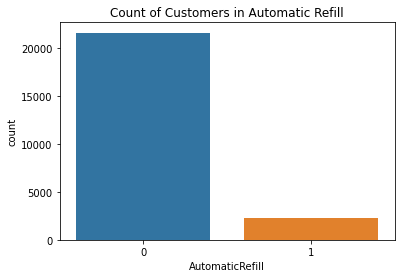

In [94]:
#Countplot for Customers count in Automatic Refill
sns.countplot('AutomaticRefill', data=finaldata,order = finaldata['AutomaticRefill'].value_counts().index)
plt.title('Count of Customers in Automatic Refill')
plt.show()

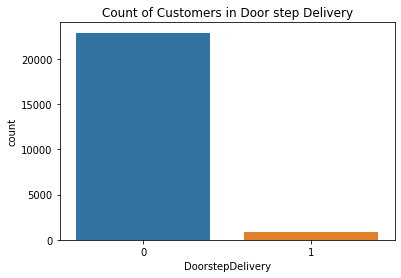

In [95]:
#Countplot for Customers count in Automatic Refill
sns.countplot('DoorstepDelivery', data=finaldata,order = finaldata['DoorstepDelivery'].value_counts().index)
plt.title('Count of Customers in Door step Delivery')
plt.show()

In [96]:
X = finaldata.drop('RetentionPotential',axis=1)       #Dropping the target attribute

In [97]:
y = finaldata['RetentionPotential']                  #Assinging the target attribute to y since it is a SuperVised ML

# Train test Split

Splittng the dataset in train and test

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17865, 21)
(5955, 21)
(17865,)
(5955,)


In [100]:
pd.value_counts(y_train)

2    14359
0     2839
1      667
Name: RetentionPotential, dtype: int64

In [101]:
pd.value_counts(y_test)

2    4826
0     917
1     212
Name: RetentionPotential, dtype: int64

# Data preprocessing

In [102]:
y_train.dtypes

CategoricalDtype(categories=[0, 2, 1], ordered=False)

In [103]:
X_train.dtypes

City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
OrderQuantity              int64
No_Of_Orders               int64
EmailType               category
MailOpened              category
MailClicked             category
CustomMails              float64
CustomMail_Open          float64
CustomMail_No            float64
MailClicked_Open         float64
MailClicked_No           float64
MonthOfRegistration        int64
MonthOfemail               int64
YearOfRegistration         int64
YearOfemail                int64
Date_of_Registration       int64
Date_of_email              int64
dtype: object

In [104]:
cat_attr = X_train.select_dtypes(include='category').columns
num_attr = X_train.select_dtypes(exclude='category').columns

Converting categorical columns into numerical arrays by One Hot Encoding

In [105]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train[cat_attr])

X_train_ohe = ohe.transform(X_train[cat_attr]).toarray()
X_test_ohe = ohe.transform(X_test[cat_attr]).toarray()

In [106]:
X_train_ohe.shape

(17865, 20)

Standarising the numerical columns with StandardScaler

In [107]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train[num_attr])

X_train_std = std.transform(X_train[num_attr])
X_test_std = std.transform(X_test[num_attr])

In [108]:
X_train_std

array([[ 0.57510151,  0.61536756,  0.8183563 , ..., -0.0940187 ,
        -0.05085205, -0.05085205],
       [ 0.09690567,  0.04546716, -1.0321418 , ..., -1.11291107,
        -1.4456399 , -1.4456399 ],
       [-0.19781321, -0.28019021,  0.51827552, ...,  1.94376605,
        -0.28331669, -0.28331669],
       ...,
       [-0.22381781, -0.28019021,  0.86836976, ..., -1.11291107,
        -0.05085205, -0.05085205],
       [ 0.00444485, -0.03594718,  1.26847745, ..., -1.11291107,
         1.3439358 ,  1.3439358 ],
       [-0.23320837, -0.28019021,  0.8183563 , ...,  1.94376605,
         0.29784492,  0.29784492]])

Merging the one hot encoding and standard scaling

In [109]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

In [110]:
X_train_con.shape ,X_test_con.shape

((17865, 33), (5955, 33))

Evaluation Model function

In [111]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
def evaluate_model(act,pred):
    print(confusion_matrix(act,pred))
    print('Accuracy:',accuracy_score(act,pred))
    print('Recall for Medium:',recall_score(act,pred,average='weighted',labels=[1]))

# Model Building

Model1 - Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier
model_dtc1 = DecisionTreeClassifier()
model_dtc1 = model_dtc1.fit(X_train_con,y_train)

In [113]:
y_train_m1 = model_dtc1.predict(X_train_con)
y_test_m1 = model_dtc1.predict(X_test_con)

In [114]:
print('--Train--')
evaluate_model(y_train,y_train_m1)
print('--Test--')
evaluate_model(y_test,y_test_m1)

--Train--
[[ 2736     0   103]
 [    0   661     6]
 [  159     6 14194]]
Accuracy: 0.9846627483907081
Recall for Medium: 0.9910044977511244
--Test--
[[ 550   14  353]
 [  18  161   33]
 [ 380   29 4417]]
Accuracy: 0.8611251049538203
Recall for Medium: 0.7594339622641509


Model2 - Decision Tree Classifier with Hyperparameters

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid_dtc1 = {"criterion": ["gini","entropy"],
                  "max_depth" : [5,7,9],
                  "max_features" : [3,7,9],
                  "min_samples_leaf" : [2,5,10],
                  "min_samples_split":[4,8,12],
                  "max_leaf_nodes":[2,6,10]}

In [117]:
model_dtc2 = DecisionTreeClassifier()
model_dtc2 = GridSearchCV(model_dtc2,param_grid_dtc1,cv=3)
model_dtc2 = model_dtc2.fit(X_train_con,y_train)
print('Best Params:',model_dtc2.best_params_)
print('Best Score:',model_dtc2.best_score_)

Best Params: {'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 12}
Best Score: 0.8715924993003079


In [118]:
y_train_m2 = model_dtc2.predict(X_train_con)
y_test_m2 = model_dtc2.predict(X_test_con)

In [119]:
print('--Train--')
evaluate_model(y_train,y_train_m2)
print('--Test--')
evaluate_model(y_test,y_test_m2)

--Train--
[[ 1738    26  1075]
 [  125   401   141]
 [  714    15 13630]]
Accuracy: 0.8826756227260005
Recall for Medium: 0.6011994002998501
--Test--
[[ 552   11  354]
 [  37  122   53]
 [ 210    5 4611]]
Accuracy: 0.887489504617968
Recall for Medium: 0.5754716981132075


Model3 - Decision Tree Classifier with Another Hyperparameters

In [120]:
param_grid_dtc2 = {"criterion": ["gini","entropy"],
                  "max_depth" : [10,15,20],
                  "max_features" : [5,8,10],
                  "min_samples_leaf" : [3,7,9],
                  "min_samples_split":[10,15,20],
                  "max_leaf_nodes":[4,8,12]}

In [121]:
model_dtc3 = DecisionTreeClassifier()
model_dtc3 = GridSearchCV(model_dtc3,param_grid_dtc2,cv=3)
model_dtc3 = model_dtc3.fit(X_train_con,y_train)
print('Best Params:',model_dtc3.best_params_)
print('Best Score:',model_dtc3.best_score_)

Best Params: {'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'max_leaf_nodes': 12, 'min_samples_leaf': 3, 'min_samples_split': 15}
Best Score: 0.8803806325216904


In [122]:
y_train_m3 = model_dtc3.predict(X_train_con)
y_test_m3 = model_dtc3.predict(X_test_con)

In [123]:
print('--Train--')
evaluate_model(y_train,y_train_m3)
print('--Test--')
evaluate_model(y_test,y_test_m3)

--Train--
[[ 1681    69  1089]
 [  341   195   131]
 [  704    25 13630]]
Accuracy: 0.8679541001959138
Recall for Medium: 0.29235382308845576
--Test--
[[ 532   23  362]
 [ 109   58   45]
 [ 201   13 4612]]
Accuracy: 0.873551637279597
Recall for Medium: 0.27358490566037735


Model4 - Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
model_rfc1 = RandomForestClassifier().fit(X_train_con,y_train)

In [125]:
y_train_m4 = model_rfc1.predict(X_train_con)
y_test_m4 = model_rfc1.predict(X_test_con)

In [126]:
print('--Train--')
evaluate_model(y_train,y_train_m4)
print('--Test--')
evaluate_model(y_test,y_test_m4)

--Train--
[[ 2656     0   183]
 [    0   656    11]
 [   79     1 14279]]
Accuracy: 0.9846627483907081
Recall for Medium: 0.9835082458770614
--Test--
[[ 562   14  341]
 [  18  154   40]
 [ 227    4 4595]]
Accuracy: 0.891855583543241
Recall for Medium: 0.7264150943396226


Model5 - Random Forest Classifier with Hyperparameters

In [127]:
param_grid_rfc1 = {"n_estimators":[10,50,100],
                 "criterion":["gini","entropy"],
                 "max_features":[3,7,10],
                 "max_depth":[5,9,15],
                 "max_leaf_nodes":[10,15,25],
                 "min_samples_split":[3,5,10]}

In [128]:
model_rfc2 = RandomForestClassifier()
model_rfc2 = GridSearchCV(model_rfc2,param_grid_rfc1,cv=3).fit(X_train_con,y_train)
print('Best Params:',model_rfc2.best_params_)
print('Best Score:',model_rfc2.best_score_)

Best Params: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'max_leaf_nodes': 25, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8893366918555836


In [129]:
y_train_m5 = model_rfc2.predict(X_train_con)
y_test_m5 = model_rfc2.predict(X_test_con)

In [130]:
print('--Train--')
evaluate_model(y_train,y_train_m5)
print('--Test--')
evaluate_model(y_test,y_test_m5)

--Train--
[[ 1785    49  1005]
 [   75   472   120]
 [  706    10 13643]]
Accuracy: 0.8900083963056256
Recall for Medium: 0.7076461769115442
--Test--
[[ 565   22  330]
 [  31  138   43]
 [ 199    4 4623]]
Accuracy: 0.8943744752308984
Recall for Medium: 0.6509433962264151


Model6 - Random Forest Classifier with another hyperparameters

In [131]:
param_grid_rfc2 = {"n_estimators":[10,50,100],
                 "criterion":["gini","entropy"],
                 "max_features":[5,9,12,],
                 "max_depth":[3,7,10],
                 "max_leaf_nodes":[5,10,15],
                 "min_samples_split":[4,6,8]}

In [132]:
model_rfc3 = RandomForestClassifier()
model_rfc3 = GridSearchCV(model_rfc3,param_grid_rfc2,cv=3).fit(X_train_con,y_train)
print('Best Params:',model_rfc3.best_params_)
print('Best Score:',model_rfc3.best_score_)

Best Params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'max_leaf_nodes': 15, 'min_samples_split': 4, 'n_estimators': 100}
Best Score: 0.8881612090680101


In [133]:
y_train_m6 = model_rfc3.predict(X_train_con)
y_test_m6 = model_rfc3.predict(X_test_con)

In [134]:
print('--Train--')
evaluate_model(y_train,y_train_m6)
print('--Test--')
evaluate_model(y_test,y_test_m6)

--Train--
[[ 1770    51  1018]
 [   78   467   122]
 [  704    12 13643]]
Accuracy: 0.8888888888888888
Recall for Medium: 0.7001499250374813
--Test--
[[ 565   21  331]
 [  26  141   45]
 [ 200    1 4625]]
Accuracy: 0.8952141057934508
Recall for Medium: 0.6650943396226415


Model7 - Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
model_log1 = LogisticRegression(multi_class='multinomial').fit(X_train_con,y_train)

In [136]:
y_train_m7 = model_log1.predict(X_train_con)
y_test_m7 = model_log1.predict(X_test_con)

In [137]:
print('--Train--')
evaluate_model(y_train,y_train_m7)
print('--Test--')
evaluate_model(y_test,y_test_m7)

--Train--
[[ 1264     4  1571]
 [   66   110   491]
 [  624    19 13716]]
Accuracy: 0.8446683459277917
Recall for Medium: 0.16491754122938532
--Test--
[[ 409    3  505]
 [  27   30  155]
 [ 169    4 4653]]
Accuracy: 0.8550797649034425
Recall for Medium: 0.14150943396226415


Model8 - Logistic Regression with Hyperparameters 

In [138]:
param_grid_logr = {'C':[0.01,0.1,1.0,10,100],
                   'penalty':['l1','l2','elasticnet'],
                   'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
                   'tol':[0.0001,0.001,0.01,0.1,1]}

In [139]:
model_log2 = LogisticRegression(multi_class='multinomial')
model_log2 = GridSearchCV(model_log2,param_grid_logr,cv=3).fit(X_train_con,y_train)
print('Best Params:',model_log2.best_params_)
print('Best Score:',model_log2.best_score_)

Best Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.1}
Best Score: 0.844556395186118


In [140]:
y_train_m8 = model_log2.predict(X_train_con)
y_test_m8 = model_log2.predict(X_test_con)

In [141]:
print('--Train--')
evaluate_model(y_train,y_train_m8)
print('--Test--')
evaluate_model(y_test,y_test_m8)

--Train--
[[ 1278     4  1557]
 [   93   101   473]
 [  623    17 13719]]
Accuracy: 0.8451161488944864
Recall for Medium: 0.15142428785607195
--Test--
[[ 411    2  504]
 [  32   27  153]
 [ 168    4 4654]]
Accuracy: 0.8550797649034425
Recall for Medium: 0.12735849056603774


Model9 - KNeighbors Classifiers

In [142]:
from sklearn.neighbors import KNeighborsClassifier
model_knn1 = KNeighborsClassifier().fit(X_train_con,y_train)

In [143]:
y_train_m9 = model_knn1.predict(X_train_con)
y_test_m9 = model_knn1.predict(X_test_con)

In [144]:
print('--Train--')
evaluate_model(y_train,y_train_m9)
print('--Test--')
evaluate_model(y_test,y_test_m9)

--Train--
[[ 1903    13   923]
 [  254   248   165]
 [  575    14 13770]]
Accuracy: 0.891183879093199
Recall for Medium: 0.37181409295352325
--Test--
[[ 507   10  400]
 [  89   52   71]
 [ 250    8 4568]]
Accuracy: 0.8609571788413098
Recall for Medium: 0.24528301886792453


Model 10  - KNearest Neighbors with hyperparameters

In [145]:
n_neighbors = list(range(1,15))
p=[1,2]
#Convert to dictionary
param_grid_knn = dict(n_neighbors=n_neighbors, p=p)

In [146]:
model_knn2 = KNeighborsClassifier(n_neighbors)
model_knn2 = GridSearchCV(model_knn2,param_grid_knn,cv=2).fit(X_train_con,y_train)
print('Best Params:',model_knn2.best_params_)
print('Best Score:',model_knn2.best_score_)

Best Params: {'n_neighbors': 9, 'p': 1}
Best Score: 0.8535125762574741


In [147]:
y_train_m10 = model_knn2.predict(X_train_con)
y_test_m10 = model_knn2.predict(X_test_con)

In [148]:
print('--Train--')
evaluate_model(y_train,y_train_m10)
print('--Test--')
evaluate_model(y_test,y_test_m10)

--Train--
[[ 1709     3  1127]
 [  284   159   224]
 [  572     2 13785]]
Accuracy: 0.876182479708928
Recall for Medium: 0.2383808095952024
--Test--
[[ 485    3  429]
 [  98   35   79]
 [ 203    2 4621]]
Accuracy: 0.8633081444164568
Recall for Medium: 0.1650943396226415


Model 11 - XGB Classifier

In [149]:
from xgboost import XGBClassifier
model_xgb1 = XGBClassifier().fit(X_train_con,y_train)

In [150]:
y_train_m11 = model_xgb1.predict(X_train_con)
y_test_m11 = model_xgb1.predict(X_test_con)

In [151]:
print('--Train--')
evaluate_model(y_train,y_train_m11)
print('--Test--')
evaluate_model(y_test,y_test_m11)

--Train--
[[ 1651    22  1166]
 [   52   520    95]
 [  583    15 13761]]
Accuracy: 0.8917996081724041
Recall for Medium: 0.7796101949025487
--Test--
[[ 519   10  388]
 [  18  156   38]
 [ 173    4 4649]]
Accuracy: 0.8940386230058774
Recall for Medium: 0.7358490566037735


Upsampling with all models

In [152]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=100)
X_train_sm, y_train_sm = smote.fit_resample(X_train_con, y_train)

In [153]:
dtc_sm = DecisionTreeClassifier().fit(X_train_sm,y_train_sm)

rfc_sm = RandomForestClassifier().fit(X_train_sm,y_train_sm)

log_sm = LogisticRegression(multi_class='multinomial').fit(X_train_sm,y_train_sm)

knn_sm = KNeighborsClassifier().fit(X_train_sm,y_train_sm)

xgb_sm = XGBClassifier().fit(X_train_sm,y_train_sm)

In [154]:
y_train_dtc_sm = dtc_sm.predict(X_train_sm)

y_train_rfc_sm = rfc_sm.predict(X_train_sm)

y_train_log_sm = log_sm.predict(X_train_sm)

y_train_knn_sm = knn_sm.predict(X_train_sm)

y_train_xgb_sm = xgb_sm.predict(X_train_sm)

In [155]:
y_test_dtc_sm = dtc_sm.predict(X_test_con)

y_test_rfc_sm = rfc_sm.predict(X_test_con)

y_test_knn_sm = knn_sm.predict(X_test_con)

y_test_log_sm = log_sm.predict(X_test_con)

y_test_xgb_sm = xgb_sm.predict(X_test_con)

In [156]:
def error_metrics(act,pred):
    print('Accuracy:',accuracy_score(act,pred))
    print('Recall:',recall_score(act,pred,average='weighted',labels=[1]))

In [157]:
print('--Decision Tree --')
error_metrics(y_train_sm,y_train_dtc_sm),
print('--Random Forest Train--')
error_metrics(y_train_sm,y_train_rfc_sm)
print('--Logistic Regression Train--')
error_metrics(y_train_sm,y_train_log_sm)
print('--KNN Train--')
error_metrics(y_train_sm,y_train_knn_sm)
print('--Gradient Boost Train--')
error_metrics(y_train_sm,y_train_xgb_sm)

--Decision Tree --
Accuracy: 0.9930589409661769
Recall: 0.9997214290688766
--Random Forest Train--
Accuracy: 0.9930589409661769
Recall: 0.9994428581377534
--Logistic Regression Train--
Accuracy: 0.784061099890893
Recall: 0.8378020753534369
--KNN Train--
Accuracy: 0.9473036655291687
Recall: 0.9983982171460408
--Gradient Boost Train--
Accuracy: 0.9137358683288066
Recall: 0.9791071801657497


In [158]:
print('--Decision Tree Test--')
error_metrics(y_test,y_test_dtc_sm)
print('--Random Forest Test--')
error_metrics(y_test,y_test_rfc_sm)
print('--Logistic Regression Test--')
error_metrics(y_test,y_test_log_sm)
print('--KNN Test--')
error_metrics(y_test,y_test_knn_sm)
print('--Gradient Boost Test--')
error_metrics(y_test,y_test_xgb_sm)

--Decision Tree Test--
Accuracy: 0.853904282115869
Recall: 0.8066037735849056
--Random Forest Test--
Accuracy: 0.8879932829554996
Recall: 0.8490566037735849
--Logistic Regression Test--
Accuracy: 0.6690176322418137
Recall: 0.7877358490566038
--KNN Test--
Accuracy: 0.8104114189756507
Recall: 0.4669811320754717
--Gradient Boost Test--
Accuracy: 0.836943744752309
Recall: 0.8773584905660378


In [159]:
Models = ['model_dtc1','model_dtc2','model_dtc3','model_rfc1','model_rfc2','model_rfc3', 
          'model_log1','model_log2','model_knn1','model_knn2','model_xgb1',
          'dtc_sm','rfc_sm','knn_sm','log_sm','xgb_sm']

# Test Data PreProcessing

In [160]:
dt1 = pd.read_csv('./Test.csv')
dt2 = pd.read_csv('./Customerdata_Test.csv')
dt3 = pd.read_csv('./transactionsdata_Test.csv')
dt4 = pd.read_csv('./Emaildata_Test.csv')

In [161]:
dt1.shape , dt2.shape , dt3.shape , dt4.shape

((5955, 1), (5955, 7), (26768, 4), (129074, 6))

In [162]:
print(dt1.columns)
print(dt2.columns)
print(dt3.columns)
print(dt4.columns)

Index(['CustomerID'], dtype='object')
Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')


In [163]:
dt1.nunique()

CustomerID    5955
dtype: int64

In [164]:
dt2.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [165]:
dt3.nunique()

CustomerID        5955
DateOfOrder       2771
timestamp        15326
OrderQuantity      372
dtype: int64

In [166]:
dt4.nunique()

CustomerID      5955
DateOfemail     3149
EmailType          2
timestamp      14366
MailOpened         2
MailClicked        3
dtype: int64

In [167]:
dtest1 = pd.merge(dt1,dt2,on=['CustomerID'],how = 'inner')

In [168]:
dtest1.shape

(5955, 7)

In [169]:
dtest1.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [170]:
dtest1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C12121,CITY1,12/4/2017,1,0,0,Friday
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday
2,C12134,CITY3,9/18/2013,1,0,0,Monday
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday
4,C12136,CITY2,9/28/2013,1,0,0,Thursday


In [171]:
dtest1.isna().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [172]:
dtest1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C12121,CITY1,12/4/2017,1,0,0,Friday
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday
2,C12134,CITY3,9/18/2013,1,0,0,Monday
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday
4,C12136,CITY2,9/28/2013,1,0,0,Thursday


In [173]:
dtest1.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [174]:
dt3 = dt3.drop('timestamp',axis=1)

In [175]:
dt3.nunique()

CustomerID       5955
DateOfOrder      2771
OrderQuantity     372
dtype: int64

In [176]:
dt4 = dt4.drop(['timestamp'],axis=1)

In [177]:
dt4.nunique()

CustomerID     5955
DateOfemail    3149
EmailType         2
MailOpened        2
MailClicked       3
dtype: int64

In [178]:
dt4['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [179]:
print(dtest1.columns)
print(dt3.columns)
print(dt4.columns)

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')


In [180]:
test1 = dt3.groupby(['CustomerID'])['OrderQuantity'].agg(sum).reset_index()

In [181]:
new_t = dt3.groupby(['CustomerID'])['OrderQuantity'].count().reset_index()
new_t = new_t.rename(columns={'OrderQuantity':'No_Of_Orders'})

In [182]:
test1 = test1.merge(new_t,on='CustomerID')

In [183]:
test1.head()

,CustomerID,OrderQuantity,No_Of_Orders
0,C12121,52,1
1,C12132,40,1
2,C12134,40,1
3,C12135,41,1
4,C12136,79,1


In [184]:
test1.shape

(5955, 3)

In [185]:
test1.head()

,CustomerID,OrderQuantity,No_Of_Orders
0,C12121,52,1
1,C12132,40,1
2,C12134,40,1
3,C12135,41,1
4,C12136,79,1


In [186]:
test1.shape

(5955, 3)

In [187]:
test1.nunique()

CustomerID       5955
OrderQuantity    1030
No_Of_Orders      106
dtype: int64

In [188]:
dtest1.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

In [189]:
dtest2 = pd.merge(dtest1,test1,on=['CustomerID'],how='inner')

In [190]:
dtest2.shape

(5955, 9)

In [191]:
dtest2.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders
0,C12121,CITY1,12/4/2017,1,0,0,Friday,52,1
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday,40,1
2,C12134,CITY3,9/18/2013,1,0,0,Monday,40,1
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday,41,1
4,C12136,CITY2,9/28/2013,1,0,0,Thursday,79,1


In [192]:
dtest2.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
OrderQuantity           1030
No_Of_Orders             106
dtype: int64

In [193]:
dt4.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')

In [194]:
dt4.shape

(129074, 5)

In [195]:
dt4.nunique()

CustomerID     5955
DateOfemail    3149
EmailType         2
MailOpened        2
MailClicked       3
dtype: int64

In [196]:
dt4['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [197]:
dt4_1 = dt4.loc[dt4['EmailType'] == 'WelcomeEmail']

In [198]:
dt4_1

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable
...,...,...,...,...,...
5950,C32947,2018-01-17,WelcomeEmail,yes,NotApplicable
5951,C28951,2018-01-17,WelcomeEmail,yes,NotApplicable
5952,C38741,2018-01-17,WelcomeEmail,yes,NotApplicable
5953,C20407,2018-01-17,WelcomeEmail,yes,NotApplicable


In [199]:
dt4_1['MailClicked'].value_counts()

NotApplicable    5955
Name: MailClicked, dtype: int64

In [200]:
dt4_2 = dt4.loc[dt4['EmailType'] == 'CustomizedEmail']
dt4_2

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
5955,C12403,2012-03-06,CustomizedEmail,yes,no
5956,C12403,2009-10-13,CustomizedEmail,yes,no
5957,C12403,2010-09-09,CustomizedEmail,yes,no
5958,C12403,2011-02-13,CustomizedEmail,yes,no
5959,C12403,2012-08-15,CustomizedEmail,no,no
...,...,...,...,...,...
129069,C30169,2018-01-15,CustomizedEmail,no,no
129070,C30169,2018-01-15,CustomizedEmail,no,no
129071,C30169,2018-01-15,CustomizedEmail,yes,yes
129072,C30169,2018-01-15,CustomizedEmail,yes,no


In [201]:
dt4_2['MailClicked'].value_counts()

no     116201
yes      6918
Name: MailClicked, dtype: int64

In [202]:
test2 = dt4_2.groupby(['CustomerID'])['EmailType'].agg('count').reset_index()

In [203]:
test2

,CustomerID,EmailType
0,C12121,24
1,C12135,29
2,C12136,41
3,C12157,27
4,C12163,46
...,...,...
3493,C42147,36
3494,C42148,46
3495,C42151,45
3496,C42153,10


In [204]:
dtest3 = pd.merge(dt4_1,test2,on=['CustomerID'],how='outer')
dtest3.head()

,CustomerID,DateOfemail,EmailType_x,MailOpened,MailClicked,EmailType_y
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0


In [205]:
dtest3 = dtest3.rename(columns={'EmailType_x':'EmailType','EmailType_y':'CustomMails'})

In [206]:
dtest3.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0


In [207]:
dt4_2.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
5955,C12403,2012-03-06,CustomizedEmail,yes,no
5956,C12403,2009-10-13,CustomizedEmail,yes,no
5957,C12403,2010-09-09,CustomizedEmail,yes,no
5958,C12403,2011-02-13,CustomizedEmail,yes,no
5959,C12403,2012-08-15,CustomizedEmail,no,no


In [208]:
dt4_3 = dt4_2.loc[dt4_2['MailOpened']=='yes']
dt4_4 = dt4_2.loc[dt4_2['MailOpened']=='no']

In [209]:
test3 = dt4_3.groupby(['CustomerID'])['MailOpened'].agg('count').reset_index()
test4 = dt4_4.groupby(['CustomerID'])['MailOpened'].agg('count').reset_index()

In [210]:
test4

,CustomerID,MailOpened
0,C12121,16
1,C12135,21
2,C12136,38
3,C12157,14
4,C12163,45
...,...,...
3372,C42147,25
3373,C42148,40
3374,C42151,36
3375,C42153,8


In [211]:
dtest4 = pd.merge(dtest3,test3,on=['CustomerID'],how='outer')
dtest4

,CustomerID,DateOfemail,EmailType,MailOpened_x,MailClicked,CustomMails,MailOpened_y
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0,37.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0,26.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0,NaN
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0,8.0
...,...,...,...,...,...,...,...
5950,C32947,2018-01-17,WelcomeEmail,yes,NotApplicable,NaN,NaN
5951,C28951,2018-01-17,WelcomeEmail,yes,NotApplicable,NaN,NaN
5952,C38741,2018-01-17,WelcomeEmail,yes,NotApplicable,NaN,NaN
5953,C20407,2018-01-17,WelcomeEmail,yes,NotApplicable,NaN,NaN


In [212]:
dtest5 = pd.merge(dtest4,test4,on=['CustomerID'],how='outer')
dtest5.head()

,CustomerID,DateOfemail,EmailType,MailOpened_x,MailClicked,CustomMails,MailOpened_y,MailOpened
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0,37.0,9.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0,26.0,34.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0,NaN,45.0
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0,8.0,5.0


In [213]:
dtest5 = dtest5.rename(columns={'MailOpened_x':'MailOpened','MailOpened_y':'CustomMail_Open','MailOpened':'CustomMail_No'})

In [214]:
dtest5.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0,37.0,9.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0,26.0,34.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0,NaN,45.0
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0,8.0,5.0


In [215]:
dt4_2.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
5955,C12403,2012-03-06,CustomizedEmail,yes,no
5956,C12403,2009-10-13,CustomizedEmail,yes,no
5957,C12403,2010-09-09,CustomizedEmail,yes,no
5958,C12403,2011-02-13,CustomizedEmail,yes,no
5959,C12403,2012-08-15,CustomizedEmail,no,no


In [216]:
dt4_5 = dt4_2.loc[dt4_2['MailClicked']=='yes']
dt4_6 = dt4_2.loc[dt4_2['MailClicked']=='no']

In [217]:
test5 = dt4_5.groupby(['CustomerID'])['MailClicked'].agg('count').reset_index()
test6 = dt4_6.groupby(['CustomerID'])['MailClicked'].agg('count').reset_index()
test6

,CustomerID,MailClicked
0,C12121,21
1,C12135,24
2,C12136,40
3,C12157,27
4,C12163,46
...,...,...
3479,C42147,31
3480,C42148,44
3481,C42151,42
3482,C42153,9


In [218]:
dtest6 = pd.merge(dtest5,test5,on=['CustomerID'],how='outer')
dtest6.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked_x,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_y
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0,37.0,9.0,7.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0,26.0,34.0,4.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0,NaN,45.0,NaN
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0,8.0,5.0,2.0


In [219]:
dtest7 = pd.merge(dtest6,test6,on=['CustomerID'],how='outer',sort=True)
dtest7.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked_x,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_y,MailClicked
0,C12121,2017-12-04,WelcomeEmail,yes,NotApplicable,24.0,8.0,16.0,3.0,21.0
1,C12132,2013-10-20,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12134,2013-09-18,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12135,2017-11-01,WelcomeEmail,yes,NotApplicable,29.0,8.0,21.0,5.0,24.0
4,C12136,2013-09-28,WelcomeEmail,yes,NotApplicable,41.0,3.0,38.0,1.0,40.0


In [220]:
dtest7 = dtest7.rename(columns={'MailClicked_x':'MailClicked','MailClicked_y':'MailClicked_Open','MailClicked':'MailClicked_No'})

In [221]:
dtest7.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No
0,C12121,2017-12-04,WelcomeEmail,yes,NotApplicable,24.0,8.0,16.0,3.0,21.0
1,C12132,2013-10-20,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12134,2013-09-18,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12135,2017-11-01,WelcomeEmail,yes,NotApplicable,29.0,8.0,21.0,5.0,24.0
4,C12136,2013-09-28,WelcomeEmail,yes,NotApplicable,41.0,3.0,38.0,1.0,40.0


In [222]:
dtest7.shape

(5955, 10)

In [223]:
dtest7.nunique()

CustomerID          5955
DateOfemail         1631
EmailType              1
MailOpened             1
MailClicked            1
CustomMails           75
CustomMail_Open       51
CustomMail_No         63
MailClicked_Open      22
MailClicked_No        72
dtype: int64

In [224]:
dtest = pd.merge(dtest2,dtest7,on=['CustomerID'],how='outer',sort=True)

In [225]:
dtest.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No
0,C12121,CITY1,12/4/2017,1,0,0,Friday,52,1,2017-12-04,WelcomeEmail,yes,NotApplicable,24.0,8.0,16.0,3.0,21.0
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday,40,1,2013-10-20,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12134,CITY3,9/18/2013,1,0,0,Monday,40,1,2013-09-18,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday,41,1,2017-11-01,WelcomeEmail,yes,NotApplicable,29.0,8.0,21.0,5.0,24.0
4,C12136,CITY2,9/28/2013,1,0,0,Thursday,79,1,2013-09-28,WelcomeEmail,yes,NotApplicable,41.0,3.0,38.0,1.0,40.0


In [226]:
dtest.shape

(5955, 18)

In [227]:
dtest.isna().sum()

CustomerID                 0
City                       0
DateOfRegistration         0
OnlineCommunication        0
AutomaticRefill            0
DoorstepDelivery           0
PreferredDeliveryDay       0
OrderQuantity              0
No_Of_Orders               0
DateOfemail                0
EmailType                  0
MailOpened                 0
MailClicked                0
CustomMails             2457
CustomMail_Open         2949
CustomMail_No           2578
MailClicked_Open        3786
MailClicked_No          2471
dtype: int64

In [228]:
finaldtest = dtest.fillna(0)

In [229]:
finaldtest.isna().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity           0
No_Of_Orders            0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
CustomMails             0
CustomMail_Open         0
CustomMail_No           0
MailClicked_Open        0
MailClicked_No          0
dtype: int64

In [230]:
finaldtest.dtypes

CustomerID               object
City                     object
DateOfRegistration       object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
OrderQuantity             int64
No_Of_Orders              int64
DateOfemail              object
EmailType                object
MailOpened               object
MailClicked              object
CustomMails             float64
CustomMail_Open         float64
CustomMail_No           float64
MailClicked_Open        float64
MailClicked_No          float64
dtype: object

In [231]:
finaldtest.shape

(5955, 18)

In [232]:
a = finaldtest['CustomerID']

In [233]:
finaldtest['MonthOfRegistration'] = pd.to_datetime(finaldtest['DateOfRegistration']).dt.month
finaldtest['MonthOfemail'] = pd.to_datetime(finaldtest['DateOfemail']).dt.month
finaldtest['YearOfRegistration'] = pd.to_datetime(finaldtest['DateOfRegistration']).dt.year
finaldtest['YearOfemail'] = pd.to_datetime(finaldtest['DateOfemail']).dt.year
finaldtest['Date_of_Registration'] = pd.to_datetime(finaldtest['DateOfRegistration']).dt.day
finaldtest['Date_of_email'] = pd.to_datetime(finaldtest['DateOfemail']).dt.day
finaldtest = finaldtest.drop(['DateOfRegistration','DateOfemail','CustomerID'],axis=1)

In [234]:
finaldtest.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,MailClicked,...,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail,YearOfRegistration,YearOfemail,Date_of_Registration,Date_of_email
0,CITY1,1,0,0,Friday,52,1,WelcomeEmail,yes,NotApplicable,...,8.0,16.0,3.0,21.0,12,12,2017,2017,4,4
1,CITY3,1,0,0,Tuesday,40,1,WelcomeEmail,yes,NotApplicable,...,0.0,0.0,0.0,0.0,10,10,2013,2013,20,20
2,CITY3,1,0,0,Monday,40,1,WelcomeEmail,yes,NotApplicable,...,0.0,0.0,0.0,0.0,9,9,2013,2013,18,18
3,CITY3,1,0,1,Wednesday,41,1,WelcomeEmail,yes,NotApplicable,...,8.0,21.0,5.0,24.0,11,11,2017,2017,1,1
4,CITY2,1,0,0,Thursday,79,1,WelcomeEmail,yes,NotApplicable,...,3.0,38.0,1.0,40.0,9,9,2013,2013,28,28


In [235]:
finaldtest.nunique()

City                       4
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
OrderQuantity           1030
No_Of_Orders             106
EmailType                  1
MailOpened                 1
MailClicked                1
CustomMails               76
CustomMail_Open           52
CustomMail_No             64
MailClicked_Open          23
MailClicked_No            73
MonthOfRegistration       12
MonthOfemail              12
YearOfRegistration        11
YearOfemail               11
Date_of_Registration      31
Date_of_email             31
dtype: int64

In [236]:
finaldtest.isna().sum()

City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity           0
No_Of_Orders            0
EmailType               0
MailOpened              0
MailClicked             0
CustomMails             0
CustomMail_Open         0
CustomMail_No           0
MailClicked_Open        0
MailClicked_No          0
MonthOfRegistration     0
MonthOfemail            0
YearOfRegistration      0
YearOfemail             0
Date_of_Registration    0
Date_of_email           0
dtype: int64

In [237]:
finaldtest.dtypes

City                     object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
OrderQuantity             int64
No_Of_Orders              int64
EmailType                object
MailOpened               object
MailClicked              object
CustomMails             float64
CustomMail_Open         float64
CustomMail_No           float64
MailClicked_Open        float64
MailClicked_No          float64
MonthOfRegistration       int64
MonthOfemail              int64
YearOfRegistration        int64
YearOfemail               int64
Date_of_Registration      int64
Date_of_email             int64
dtype: object

In [238]:
finaldtest['OnlineCommunication'] = finaldtest['OnlineCommunication'].astype('object')
finaldtest['DoorstepDelivery'] = finaldtest['DoorstepDelivery'].astype('object')
finaldtest['AutomaticRefill'] = finaldtest['AutomaticRefill'].astype('object')

In [239]:
cat_cols = finaldtest.select_dtypes(include='object').columns
num_cols = finaldtest.select_dtypes(exclude='object').columns

In [240]:
for col in cat_cols:
    finaldtest[col] = finaldtest[col].astype('category')

In [241]:
finaldtest.dtypes

City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
OrderQuantity              int64
No_Of_Orders               int64
EmailType               category
MailOpened              category
MailClicked             category
CustomMails              float64
CustomMail_Open          float64
CustomMail_No            float64
MailClicked_Open         float64
MailClicked_No           float64
MonthOfRegistration        int64
MonthOfemail               int64
YearOfRegistration         int64
YearOfemail                int64
Date_of_Registration       int64
Date_of_email              int64
dtype: object

In [242]:
finaldtest_ohe = ohe.transform(finaldtest[cat_attr]).toarray()

In [243]:
finaldtest_std = std.transform(finaldtest[num_attr])

In [244]:
finaldtest_con = np.concatenate([finaldtest_ohe,finaldtest_std],axis=1)

In [245]:
models = [model_dtc1,model_dtc2,model_dtc3,model_rfc1,model_rfc2,model_rfc3,
         model_log1,model_log2,model_knn1,model_xgb1,
         dtc_sm,rfc_sm,knn_sm,log_sm,xgb_sm]

In [246]:
Models = ['model_dtc1','model_dtc2','model_dtc3','model_rfc1','model_rfc2','model_rfc3',
         'model_log1','model_log2','model_knn1','model_xgb1',
         'dtc_sm','rfc_sm','knn_sm','log_sm','xgb_sm']

In [247]:
list1 = []
for model in models:
    predictions = model.predict(finaldtest_con)
    list1.append(predictions)
print(list1)

[array([2, 2, 2, ..., 0, 1, 2]), array([2, 2, 2, ..., 2, 2, 2]), array([2, 2, 2, ..., 2, 2, 2]), array([2, 2, 2, ..., 2, 2, 2]), array([2, 2, 2, ..., 2, 2, 2]), array([2, 2, 2, ..., 2, 2, 2]), array([2, 2, 2, ..., 2, 2, 0]), array([2, 2, 2, ..., 2, 2, 0]), array([2, 2, 2, ..., 2, 2, 2]), array([2, 2, 2, ..., 2, 2, 2]), array([2, 1, 1, ..., 2, 1, 1]), array([2, 2, 2, ..., 2, 2, 2]), array([2, 2, 2, ..., 2, 2, 2]), array([2, 2, 0, ..., 2, 2, 0]), array([1, 2, 2, ..., 1, 1, 2])]


In [248]:
model_df = pd.DataFrame(data=list1).T

In [249]:
model_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,1,2,2,0,2
3,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
4,1,2,2,2,2,2,2,2,2,2,2,2,1,1,1


In [250]:
model_df.columns = Models
model_df.head()

,model_dtc1,model_dtc2,model_dtc3,model_rfc1,model_rfc2,model_rfc3,model_log1,model_log2,model_knn1,model_xgb1,dtc_sm,rfc_sm,knn_sm,log_sm,xgb_sm
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,1,2,2,0,2
3,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
4,1,2,2,2,2,2,2,2,2,2,2,2,1,1,1


In [251]:
for i in model_df.columns:
    print('\n',model_df[i].value_counts())


 2    3892
1    1635
0     428
Name: model_dtc1, dtype: int64

 2    5955
Name: model_dtc2, dtype: int64

 2    5955
Name: model_dtc3, dtype: int64

 2    5955
Name: model_rfc1, dtype: int64

 2    5955
Name: model_rfc2, dtype: int64

 2    5955
Name: model_rfc3, dtype: int64

 2    3863
0    2078
1      14
Name: model_log1, dtype: int64

 2    4792
0    1127
1      36
Name: model_log2, dtype: int64

 2    5951
0       4
Name: model_knn1, dtype: int64

 2    5955
Name: model_xgb1, dtype: int64

 2    4421
1    1534
Name: dtc_sm, dtype: int64

 2    5667
1     288
Name: rfc_sm, dtype: int64

 2    5319
1     340
0     296
Name: knn_sm, dtype: int64

 2    3526
0    2193
1     236
Name: log_sm, dtype: int64

 1    4250
2    1705
Name: xgb_sm, dtype: int64


# Predicting the different models with testdata

In [252]:
predicted_model = xgb_sm.predict(finaldtest_con)

In [253]:
predicted_model

array([1, 2, 2, ..., 1, 1, 2])

Assinging them to column by adding to the data frame

In [254]:
finaldtest['RetentionPotential'] = predicted_model

In [255]:
finaldtest.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,MailClicked,...,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail,YearOfRegistration,YearOfemail,Date_of_Registration,Date_of_email,RetentionPotential
0,CITY1,1,0,0,Friday,52,1,WelcomeEmail,yes,NotApplicable,...,16.0,3.0,21.0,12,12,2017,2017,4,4,1
1,CITY3,1,0,0,Tuesday,40,1,WelcomeEmail,yes,NotApplicable,...,0.0,0.0,0.0,10,10,2013,2013,20,20,2
2,CITY3,1,0,0,Monday,40,1,WelcomeEmail,yes,NotApplicable,...,0.0,0.0,0.0,9,9,2013,2013,18,18,2
3,CITY3,1,0,1,Wednesday,41,1,WelcomeEmail,yes,NotApplicable,...,21.0,5.0,24.0,11,11,2017,2017,1,1,2
4,CITY2,1,0,0,Thursday,79,1,WelcomeEmail,yes,NotApplicable,...,38.0,1.0,40.0,9,9,2013,2013,28,28,1


In [256]:
finaldtest['RetentionPotential'].value_counts()

1    4250
2    1705
Name: RetentionPotential, dtype: int64

In [257]:
finaldtest['CustomerID'] = a

In [258]:
finaldtest.head(2)

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,MailClicked,...,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail,YearOfRegistration,YearOfemail,Date_of_Registration,Date_of_email,RetentionPotential,CustomerID
0,CITY1,1,0,0,Friday,52,1,WelcomeEmail,yes,NotApplicable,...,3.0,21.0,12,12,2017,2017,4,4,1,C12121
1,CITY3,1,0,0,Tuesday,40,1,WelcomeEmail,yes,NotApplicable,...,0.0,0.0,10,10,2013,2013,20,20,2,C12132


In [259]:
predicteddata = finaldtest[['CustomerID','RetentionPotential']]

In [260]:
predicteddata.to_csv('SravanKumar_Venigalla_RPL_FinalHack.csv',index=False)

In [261]:
predicteddata.head()

,CustomerID,RetentionPotential
0,C12121,1
1,C12132,2
2,C12134,2
3,C12135,2
4,C12136,1
